# -----------------------------Galveston Foot Traffic Map (Old) -----------------------------------------------

In [116]:
# import necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [88]:
# read shapefile of Texas using the GeoPandas library
# shapefile is the basis of making a map
# it is downloaded from the Texas government website
gdf = gpd.read_file("tl_2022_48_bg.shp")
gdf.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,48,167,721902,3,481677219023,Block Group 3,G5030,S,33654096,4744744,+29.4376953,-094.9821525,"POLYGON ((-95.03908 29.45338, -95.03904 29.453..."
1,48,167,720604,1,481677206041,Block Group 1,G5030,S,3553373,1520,+29.4634761,-095.1023099,"POLYGON ((-95.11271 29.46883, -95.10839 29.468..."
2,48,167,720508,2,481677205082,Block Group 2,G5030,S,741356,0,+29.4943891,-095.1300397,"POLYGON ((-95.13440 29.49006, -95.13351 29.490..."
3,48,167,721102,3,481677211023,Block Group 3,G5030,S,1534343,0,+29.4685956,-095.0369269,"POLYGON ((-95.04680 29.46984, -95.04562 29.469..."
4,48,167,723504,2,481677235042,Block Group 2,G5030,S,2225482,3606,+29.3824697,-095.1278252,"POLYGON ((-95.13927 29.38687, -95.13906 29.387..."


In [89]:
df = pd.read_csv("galv_grouped.csv")
df.head()

,area,raw_stop_counts,raw_device_counts,distance_from_home,distance_from_primary_daytime_location,median_dwell,year
0,481677201001,30410.250000,4336.083333,5604.000000,6709.333333,90.091667,2019.0
1,481677201002,6018.500000,789.000000,4280.583333,5853.583333,159.502083,2019.0
2,481677201003,14631.000000,2921.833333,5135.583333,5784.750000,57.493056,2019.0
3,481677202001,26202.583333,4617.000000,5517.250000,6371.416667,79.833333,2019.0
4,481677202002,27736.583333,8020.083333,4728.250000,5522.416667,41.429167,2019.0


In [90]:
# create a new column with GEOID as integer type
# this is just for the ease of later processing
gdf["int_geoid"] =gdf["GEOID"].astype(int)

# make the content of the column as a list
all_ = gdf['int_geoid'].values
all_ = list(all_)

In [91]:
# filter out all the rows with the target geoids
galv = gpd.GeoDataFrame()
for i in df['area']:
    if i in all_:
        row = gdf.loc[gdf['int_geoid'] == i]
        galv = pd.concat([galv, row])    

In [94]:
len(galv)

142

In [93]:
len(df)

194

**Notes:** This "gdf" shapefile does not contain all the areas in our foot traffic data "df", but we cannot find better shapefiles so far, so let's just use it for now.

In [107]:
# merge two dataframes so that GEOID and raw_stop_counts can be in the same df for later plotting
df['int_geoid'] = df['area']
galv_plot = pd.merge(df, galv, on='int_geoid')
galv_plot = gpd.GeoDataFrame(galv_plot)

Text(146.625, 0.5, 'Latitude')

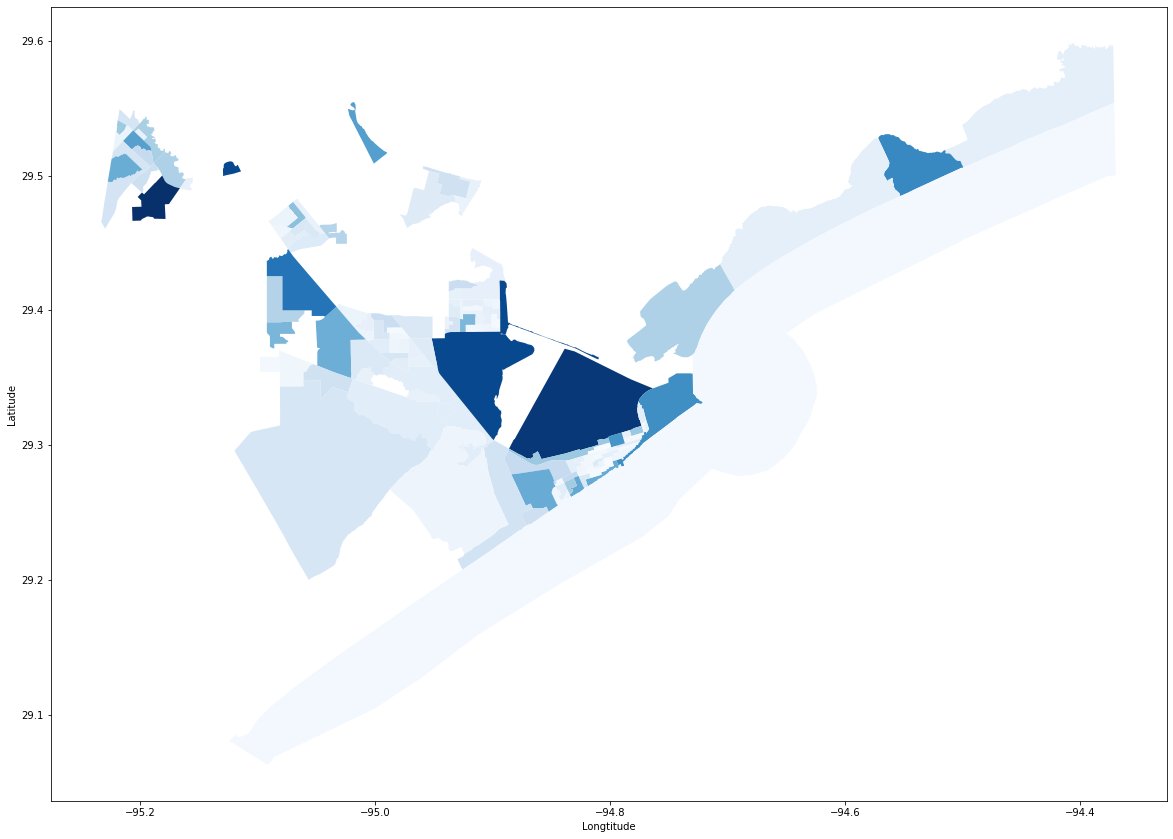

In [117]:
galv_plot.plot(figsize=(20,20), column = galv_plot['raw_stop_counts'], cmap = "Blues")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")

### Comments for further improvement:

1. We need to find a better shapefile
2. ??? this graph is inherently confusing right now... cannot even tell if this is galveston# Galveston Foot Traffic Map# Galveston Foot Traffic Map

# -----------------Hilo Foot Traffic Map (New)-----------------------------------------------

In [170]:
# all census block groups in Hilo
# source: https://hub.arcgis.com/datasets/TEA-Texas::census-block-group-map/explore?location=19.684416%2C-155.109262%2C13.17
# total of 31 census block groups within Hilo city
hilo_cbg = [
    150010203002, 150010203001, 150010203003,
    150010204001, 150010204002, 150010204004,
    150010204003, 150010208021, 150010208022,
    150010208023, 150010208024, 150010208011,
    150010208012, 150010205005, 150010205003, 
    150010205001, 150010206001, 150010205002,
    150010205004, 150010206002, 150010206003,
    150010206004, 150010207011, 150010207013, 
    150010207012, 150010207023, 150010207022,
    150010207021, 150010209003, 150010209002,
    150010209001
]

In [171]:
# read shapefile of Hawaii using the GeoPandas library
# shapefile is the basis of making a map
# it is downloaded from the Hawaii government website
gdf2 = gpd.read_file("tl_2022_15_bg.shp")
gdf2.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,15,003,008948,3,150030089483,Block Group 3,G5030,S,218082,0,+21.4163387,-158.0001276,"POLYGON ((-158.00316 21.41611, -158.00303 21.4..."
1,15,003,003414,3,150030034143,Block Group 3,G5030,S,75471,0,+21.3057486,-157.8341108,"POLYGON ((-157.83565 21.30533, -157.83561 21.3..."
2,15,003,008952,3,150030089523,Block Group 3,G5030,S,921290,0,+21.3970488,-158.0141359,"POLYGON ((-158.02013 21.39627, -158.02007 21.3..."
3,15,003,008947,1,150030089471,Block Group 1,G5030,S,272431,0,+21.4193208,-158.0022519,"POLYGON ((-158.00555 21.41953, -158.00494 21.4..."
4,15,003,008948,2,150030089482,Block Group 2,G5030,S,189770,0,+21.4097914,-157.9966614,"POLYGON ((-157.99973 21.41055, -157.99933 21.4..."


In [173]:
# read our hilo foot traffic data
df2 = pd.read_csv("hilo_grouped.csv")
df2.head()

,area,raw_stop_counts,raw_device_counts,distance_from_home,distance_from_primary_daytime_location,median_dwell,year
0,150010201001,4080.416667,751.500000,2.285100e+04,2.206783e+04,102.040278,2019.0
1,150010201002,3658.166667,874.250000,3.948287e+06,3.973251e+06,76.461111,2019.0
2,150010201003,2547.833333,699.500000,1.425286e+06,1.473584e+06,44.125000,2019.0
3,150010201004,3291.000000,462.416667,1.123542e+04,1.093208e+04,135.842361,2019.0
4,150010202021,2945.083333,717.000000,2.116833e+04,2.036758e+04,46.581250,2019.0


In [177]:
# create a new column with GEOID as integer type
# this is just for the ease of later processing
gdf2["int_geoid"] =gdf2["GEOID"].astype(int)
df2['int_geoid'] = df2['area']

# make the content of the column as a list
all2_ = gdf2['int_geoid'].values
all2_ = list(all2_)

all3_ = df2['int_geoid'].values
all3_ = list(all3_)

# filter out all the rows with the target census block groups from shapefile "gdf2"
hilo = gpd.GeoDataFrame()
for i in hilo_cbg:
    if i in all2_:
        row = gdf2.loc[gdf2['int_geoid'] == i]
        hilo = pd.concat([hilo, row])
        
# filter out all the rows with the target census block groups from foot traffic data file "df2"
foot_filtered = pd.DataFrame()
for i in hilo_cbg:
    if i in all3_:
        row = df2.loc[df2['int_geoid'] == i]
        foot_filtered = pd.concat([foot_filtered, row])

**Notes:** This "gdf2" shapefile does not contain all the areas in our foot traffic data "df2", but we cannot find better shapefiles so far, so let's just use it for now.

In [182]:
# merge two dataframes so that GEOID and raw_stop_counts can be in the same df for later plotting
hilo_plot = pd.merge(foot_filtered, hilo, on='int_geoid')
hilo_plot = gpd.GeoDataFrame(hilo_plot)

Text(0.5, 1.0, 'Foot Traffic Map of Hilo, HI')

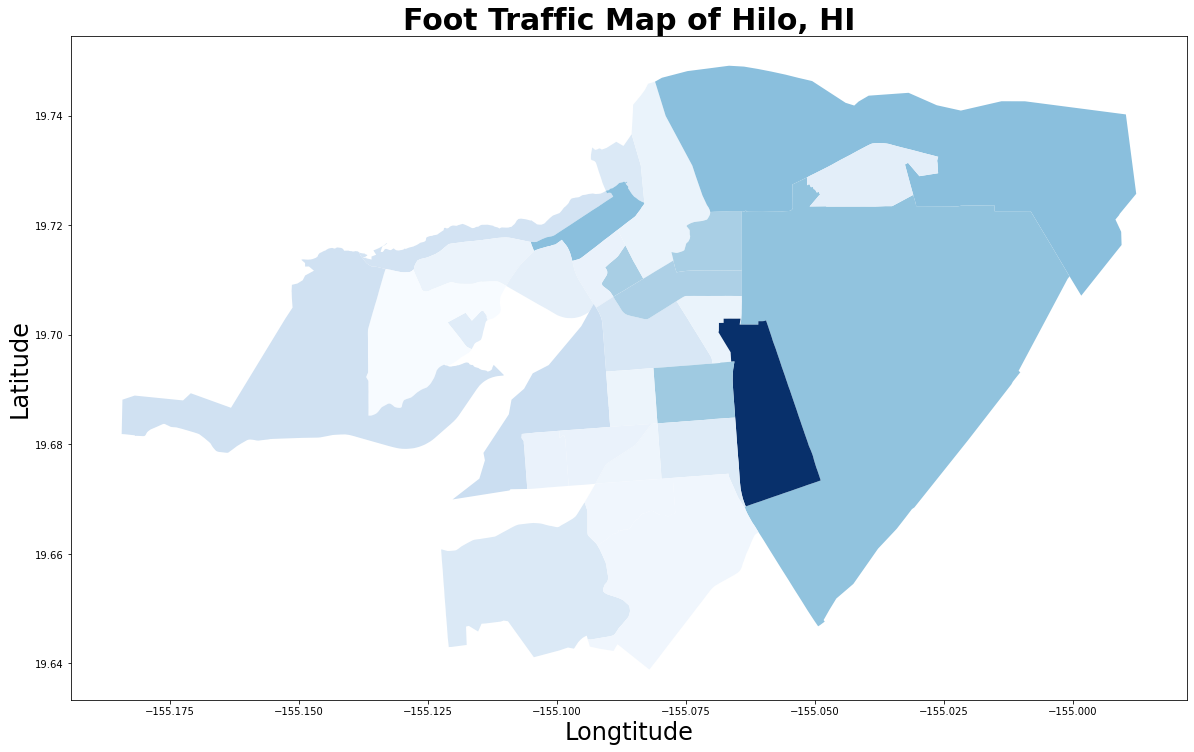

In [194]:
hilo_plot.plot(figsize=(20,20), column = hilo_plot['raw_stop_counts'], cmap = "Blues")
plt.xlabel("Longtitude", fontsize = 24)
plt.ylabel("Latitude", fontsize = 24)
plt.title("Foot Traffic Map of Hilo, HI", fontsize = 30, weight='bold')

# -----------------Galveston Foot Traffic Map (New)-----------------------------------------------

In [199]:
# all census block groups in Galveston
# source: https://hub.arcgis.com/datasets/TEA-Texas::census-block-group-map/explore?location=29.320024%2C-94.774314%2C13.66
# total of xx census block groups within Galveston city
galv_cbg = [
    481677240001, 481677241011, 481677242003, 481677242001,
    481677242002, 481677243001, 481677243005, 481677243002, 
    481677243003, 481677243004, 481677244002, 481677244003, 
    481677244004, 481677244001, 481677245001, 481677248001,
    481677248002, 481677240002, 481677246002, 481677251001,
    481677247001, 481677247002, 481677249001, 481677249002,
    481677249003, 481677241012, 481677246001, 481677252001,
    481677251002, 481677251003, 481677250001, 481677250002,
    481677250003, 481677253002, 481677254001, 481677254004,
    481677255001, 481677252002, 481677254003, 481677254002,
    481677255002, 481677253001, 481677258002, 481677256002,
    481677258003, 481677258001, 481677256003, 481677257001,
    481677256004, 481677256001, 481677257002, 481677259001,
    481677259002, 481677260001, 481677260002, 481677261001,
    481677261002
]

In [197]:
# read shapefile of Texas using the GeoPandas library
# shapefile is the basis of making a map
# it is downloaded from the Texas government website
gdf3 = gpd.read_file("tl_2022_48_bg.shp")
gdf3.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,48,167,721902,3,481677219023,Block Group 3,G5030,S,33654096,4744744,+29.4376953,-094.9821525,"POLYGON ((-95.03908 29.45338, -95.03904 29.453..."
1,48,167,720604,1,481677206041,Block Group 1,G5030,S,3553373,1520,+29.4634761,-095.1023099,"POLYGON ((-95.11271 29.46883, -95.10839 29.468..."
2,48,167,720508,2,481677205082,Block Group 2,G5030,S,741356,0,+29.4943891,-095.1300397,"POLYGON ((-95.13440 29.49006, -95.13351 29.490..."
3,48,167,721102,3,481677211023,Block Group 3,G5030,S,1534343,0,+29.4685956,-095.0369269,"POLYGON ((-95.04680 29.46984, -95.04562 29.469..."
4,48,167,723504,2,481677235042,Block Group 2,G5030,S,2225482,3606,+29.3824697,-095.1278252,"POLYGON ((-95.13927 29.38687, -95.13906 29.387..."


In [198]:
# read the galveston foot traffic data
df3 = pd.read_csv("galv_grouped.csv")
df3.head()

,area,raw_stop_counts,raw_device_counts,distance_from_home,distance_from_primary_daytime_location,median_dwell,year
0,481677201001,30410.250000,4336.083333,5604.000000,6709.333333,90.091667,2019.0
1,481677201002,6018.500000,789.000000,4280.583333,5853.583333,159.502083,2019.0
2,481677201003,14631.000000,2921.833333,5135.583333,5784.750000,57.493056,2019.0
3,481677202001,26202.583333,4617.000000,5517.250000,6371.416667,79.833333,2019.0
4,481677202002,27736.583333,8020.083333,4728.250000,5522.416667,41.429167,2019.0


In [200]:
# create a new column with GEOID as integer type
# this is just for the ease of later processing
gdf3["int_geoid"] =gdf3["GEOID"].astype(int)
df3['int_geoid'] = df3['area']

# make the content of the column as a list
all4_ = gdf3['int_geoid'].values
all4_ = list(all4_)

all5_ = df3['int_geoid'].values
all5_ = list(all5_)

# filter out all the rows with the target census block groups from shapefile "gdf3"
galv = gpd.GeoDataFrame()
for i in galv_cbg:
    if i in all4_:
        row = gdf3.loc[gdf3['int_geoid'] == i]
        galv = pd.concat([galv, row])
        
# filter out all the rows with the target census block groups from foot traffic data file "df3"
galv_foot_filtered = pd.DataFrame()
for i in galv_cbg:
    if i in all5_:
        row = df3.loc[df3['int_geoid'] == i]
        galv_foot_filtered = pd.concat([galv_foot_filtered, row])

In [201]:
# merge two dataframes so that GEOID and raw_stop_counts can be in the same df for later plotting
galv_plot = pd.merge(galv_foot_filtered, galv, on='int_geoid')
galv_plot = gpd.GeoDataFrame(galv_plot)

Text(0.5, 1.0, 'Foot Traffic Map of Galveston, TX')

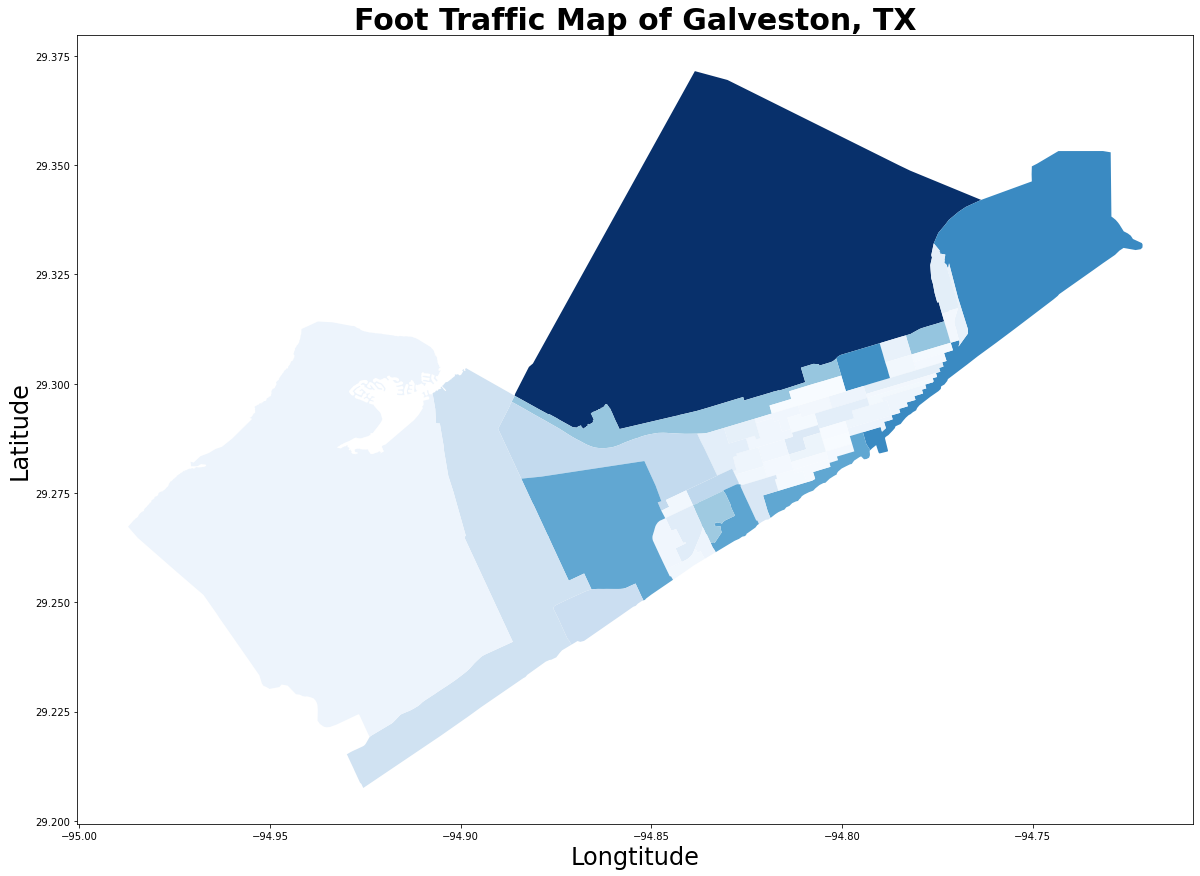

In [202]:
galv_plot.plot(figsize=(20,20), column = galv_plot['raw_stop_counts'], cmap = "Blues")
plt.xlabel("Longtitude", fontsize = 24)
plt.ylabel("Latitude", fontsize = 24)
plt.title("Foot Traffic Map of Galveston, TX", fontsize = 30, weight='bold')